<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/EXERCISE/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test)= fashion_mnist.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

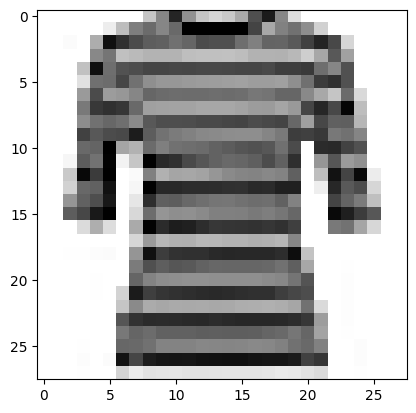

In [13]:
import matplotlib.pyplot as plt
thing = x_train[26]
plt. imshow(thing, cmap = plt.cm.binary)
plt.show()
# print('so:', x_train[26])

<ipython-input-14-e961ff48b209>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


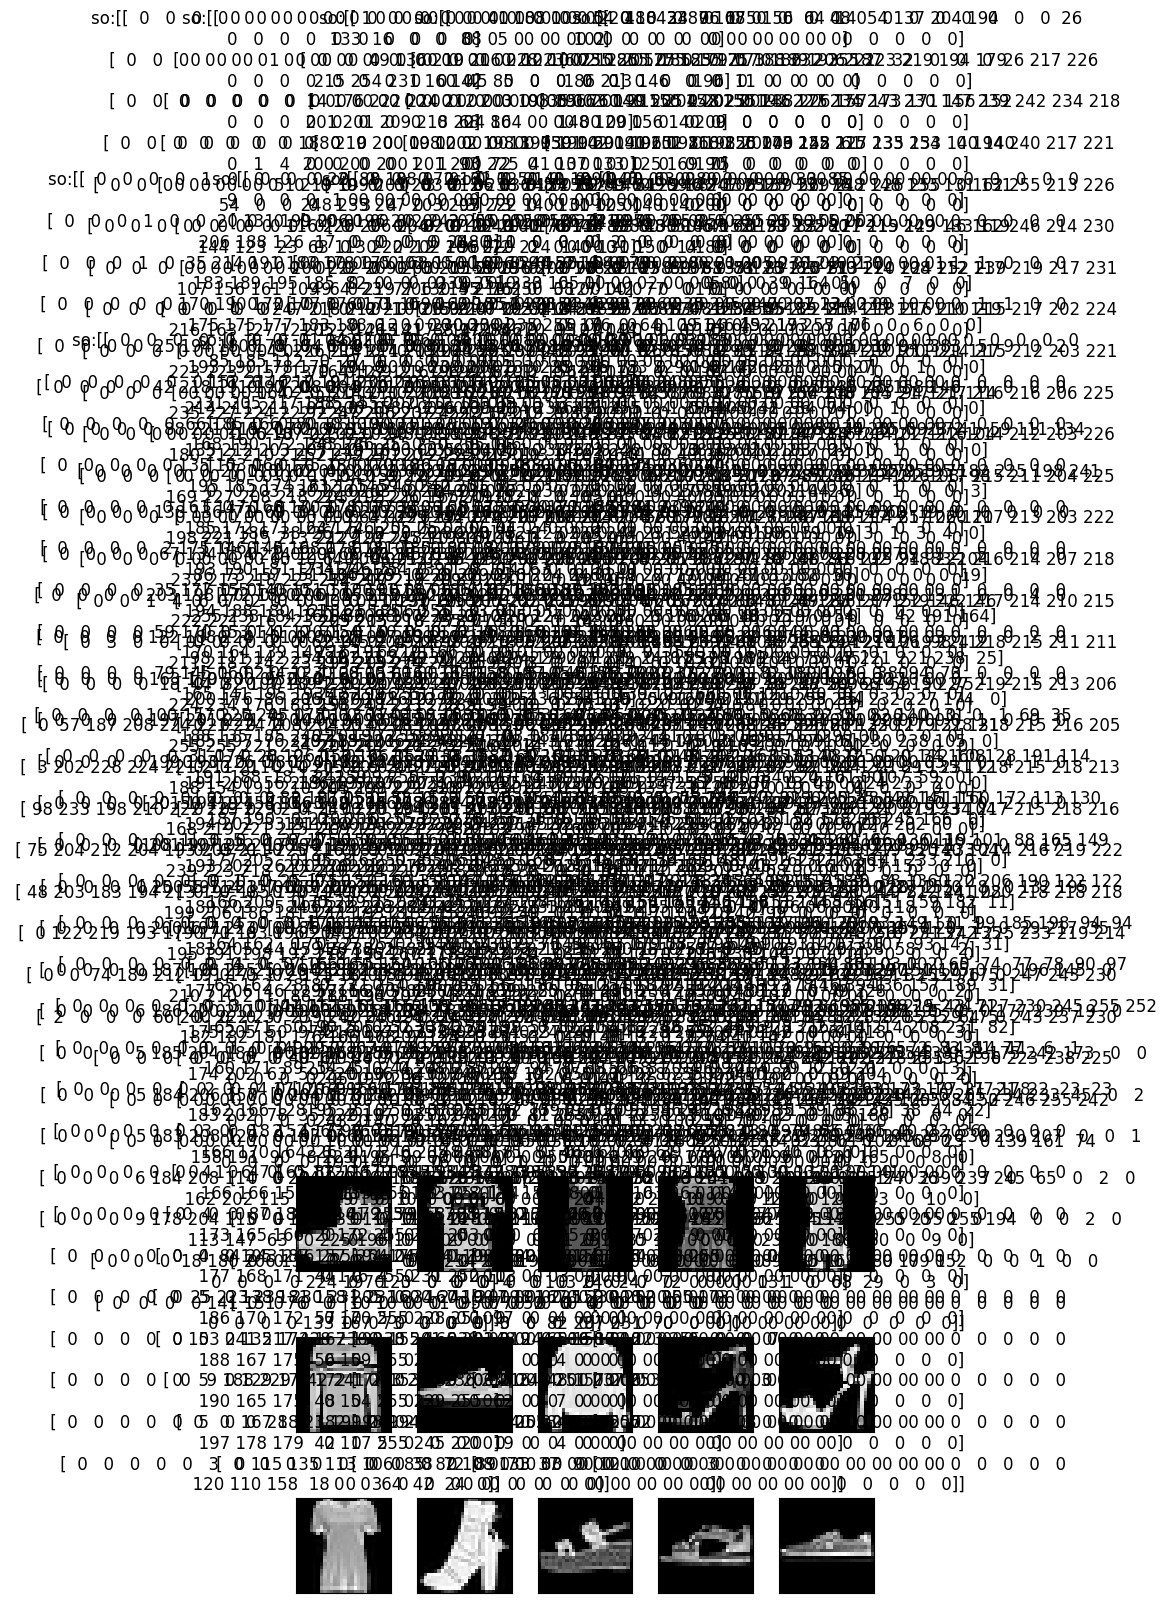

In [14]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap= 'gray',interpolation='none')
  plt.title('so:{} '.format(x_train[i]))
  plt.xticks([])
  plt.yticks([])

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(10000,activation = 'relu', input_shape = (28*28,)))
model.add(Dense(7000,activation = 'relu'))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(100,activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10000)             7850000   
                                                                 
 dense_5 (Dense)             (None, 7000)              70007000  
                                                                 
 dense_6 (Dense)             (None, 1000)              7001000   
                                                                 
 dense_7 (Dense)             (None, 100)               100100    
                                                                 
Total params: 84,958,100
Trainable params: 84,958,100
Non-trainable params: 0
_________________________________________________________________


In [16]:
X= x_test
y= y_test

In [18]:
x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255

In [19]:
print(x_test.shape)
print(x_train.shape)

(10000, 784)
(60000, 784)


In [20]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [21]:
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics= 'accuracy')
model.fit(x_train, y_train, epochs = 10, batch_size =128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("loss;" , test_loss)
print("Accuracy:", test_acc)

Epoch 1/10
469/469 [==============================] - 19s 27ms/step - loss: 0.7803 - accuracy: 0.7501
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.4041 - accuracy: 0.8493
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 0.3533 - accuracy: 0.8676
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.3195 - accuracy: 0.8810
Epoch 5/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2999 - accuracy: 0.8867
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2816 - accuracy: 0.8931
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2676 - accuracy: 0.8978
Epoch 8/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2564 - accuracy: 0.9038
Epoch 9/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2425 - accuracy: 0.9074
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.3736 

In [22]:
model.save("test.h5")

In [23]:
from keras.utils import load_img

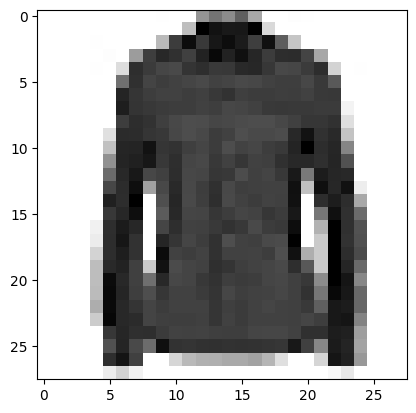

1/1 [==============================] - 0s 86ms/step


array([6])

In [28]:
from keras.utils.image_utils import img_to_array


img = X[26]
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')/255

import numpy as np

ketqua=np.argmax(model.predict(img), axis = 1)
ketqua